In [1]:
from emlib import emlib
import logging
emlib.emlog.setLevel(logging.INFO)

In [2]:
def NPZNB_int(t,initial,dtinput,constants):

    B = initial[0]             # benthos
    P = initial[1]             # phytoplankton
    Z = initial[2]             # zooplankton
    DIN = initial[3]           # dissolved inorganic
    DON = initial[4]           # dissolved organic
    ddin = dtinput.Val("ddin") #Concentration by day from WRTDS model 2 columns date and ddin Units are mg/L N
    ddon = dtinput.Val("ddon") #Concentration by day from WRTDS model 2 columns date and ddon mg/l N
    
    i = constants.Val("i")      #irradiance
    Pg = constants.Val("Pg")    # max P growth
    Bg = constants.Val("Bg")    # max B growth
    e = constants.Val("e")      # Z ingestion
    Zm = constants.Val("Zm")    # Z mortality
    Pm = constants.Val("Pm")    # P mortality
    Bm = constants.Val("Bm")    # B mortality
    Pe = constants.Val("Pe")    # P excretion
    Be = constants.Val("Be")    # B excretion
    Pr = constants.Val("Pr")    # P recycle
    h = constants.Val("h")      # Z grazing
    s = constants.Val("s")      # sedimentation
    f = constants.Val("f")      # flushing rate
    
    B_dot = (Bg * B)/ (1 + Bg * B) * (DON + DIN) - (Bm * B) - (Be * B * B)
    P_dot = (i * Pg * P * DIN) + (Pr * DON * P) - (h * P * Z) - (Pm * P * P) - (Pe * P)
    Z_dot = (h * e) - (h * P * Z) - (Zm * Z *Z )
   
    
    DIN_dot = ddin + (0.8* (1 - e) * h * P * Z) + (Be * B)+  (Pe * P) \
                - (i * Pg * P * DIN) - ((Bg * B)/ (1 + Bg * B) * (DIN)) - (f * DIN)
    DON_dot = ddon + (Bm * B)  +(Pm * P)  + (Zm * Z)  + (0.2 * (1 - e) * h * P * Z) \
             - (Pr * DON * P)  - ((Bg * B)/ (1 + Bg * B) * (DON))  - (s * DON) - (f * DON)
    return [B_dot,P_dot, Z_dot, DIN_dot, DON_dot]

In [3]:
NPZNB = emlib.Model(NPZNB_int) #save the model

INFO -1104- New Model(1): NPZNB_int
INFO -1116- No algorithm supplied assuming vode/bfd O12 Nsteps3000 dt1


In [8]:
nutrients= emlib.TimeSeries(dirname="Data",filename="Nueces_input.csv") #loading in input timeseries data ddin and ddon in same file
nutrients_alltime= emlib.TimeSeries(dirname="Data",filename="Nueces_input_all.csv")

benthos_observation = emlib.Observation ("B", dirname="Data",filename= "NB_MG_Calibrate.csv")  
zoop_observation = emlib.Observation ("Z", dirname="Data",filename= "NB_Zoop.csv")  
chla_observation = emlib.Observation ("P", dirname="Data",filename= "NB_Chl_Calibrate.csv")  

NPZNBcalibration = emlib.Calibration()  #all of our coefficients
NPZNBcalibration.Add("i",val=2.54402, min= 0.01, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("Pg",val=2.2672251,min= 0.01, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("Bg",val=1.03903,min= 0.01, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("e",val=1.77639,min= 0.01, max= 2.0)#from Turner 2014
NPZNBcalibration.Add("Zm",val=0.028854,min= 0.01, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("Pm",val=2.61708,min= 0.01, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("Bm",val=1.18918,min= 0.01, max= 1.5)#from Turner 2014
NPZNBcalibration.Add("Pe",val=1.24452553,min= 0.01, max= 3.0)#random number
NPZNBcalibration.Add("Be",val=0.92205,min= 0.01, max= 1.5)#random number
NPZNBcalibration.Add("Pr",val=2.2753,min= 0.01, max= 3.0)#random number
NPZNBcalibration.Add("h",val=1.14171,min=0.01,max=3.0)#random moving number
NPZNBcalibration.Add("s",val=0.11773830,min= .01, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("f",val=0.0570468,min= .01, max= 2.0)#from Turner 2014
NPZNBcalibration.initial=[0.5,0.5,0.5,0.5,0.5]

legend = ["B", "P", "Z", "DIN","DON"]   #our graph legend



INFO -879- New TimeSeries instance: 5
INFO -879- New TimeSeries instance: 6
INFO -758- Read file DataNB_MG_Calibrate.csv 64 Observations for value B
INFO -758- Read file DataNB_Zoop.csv 3 Observations for value Z
INFO -758- Read file DataNB_Chl_Calibrate.csv 9 Observations for value P
INFO -352- New Calibration instance: 2


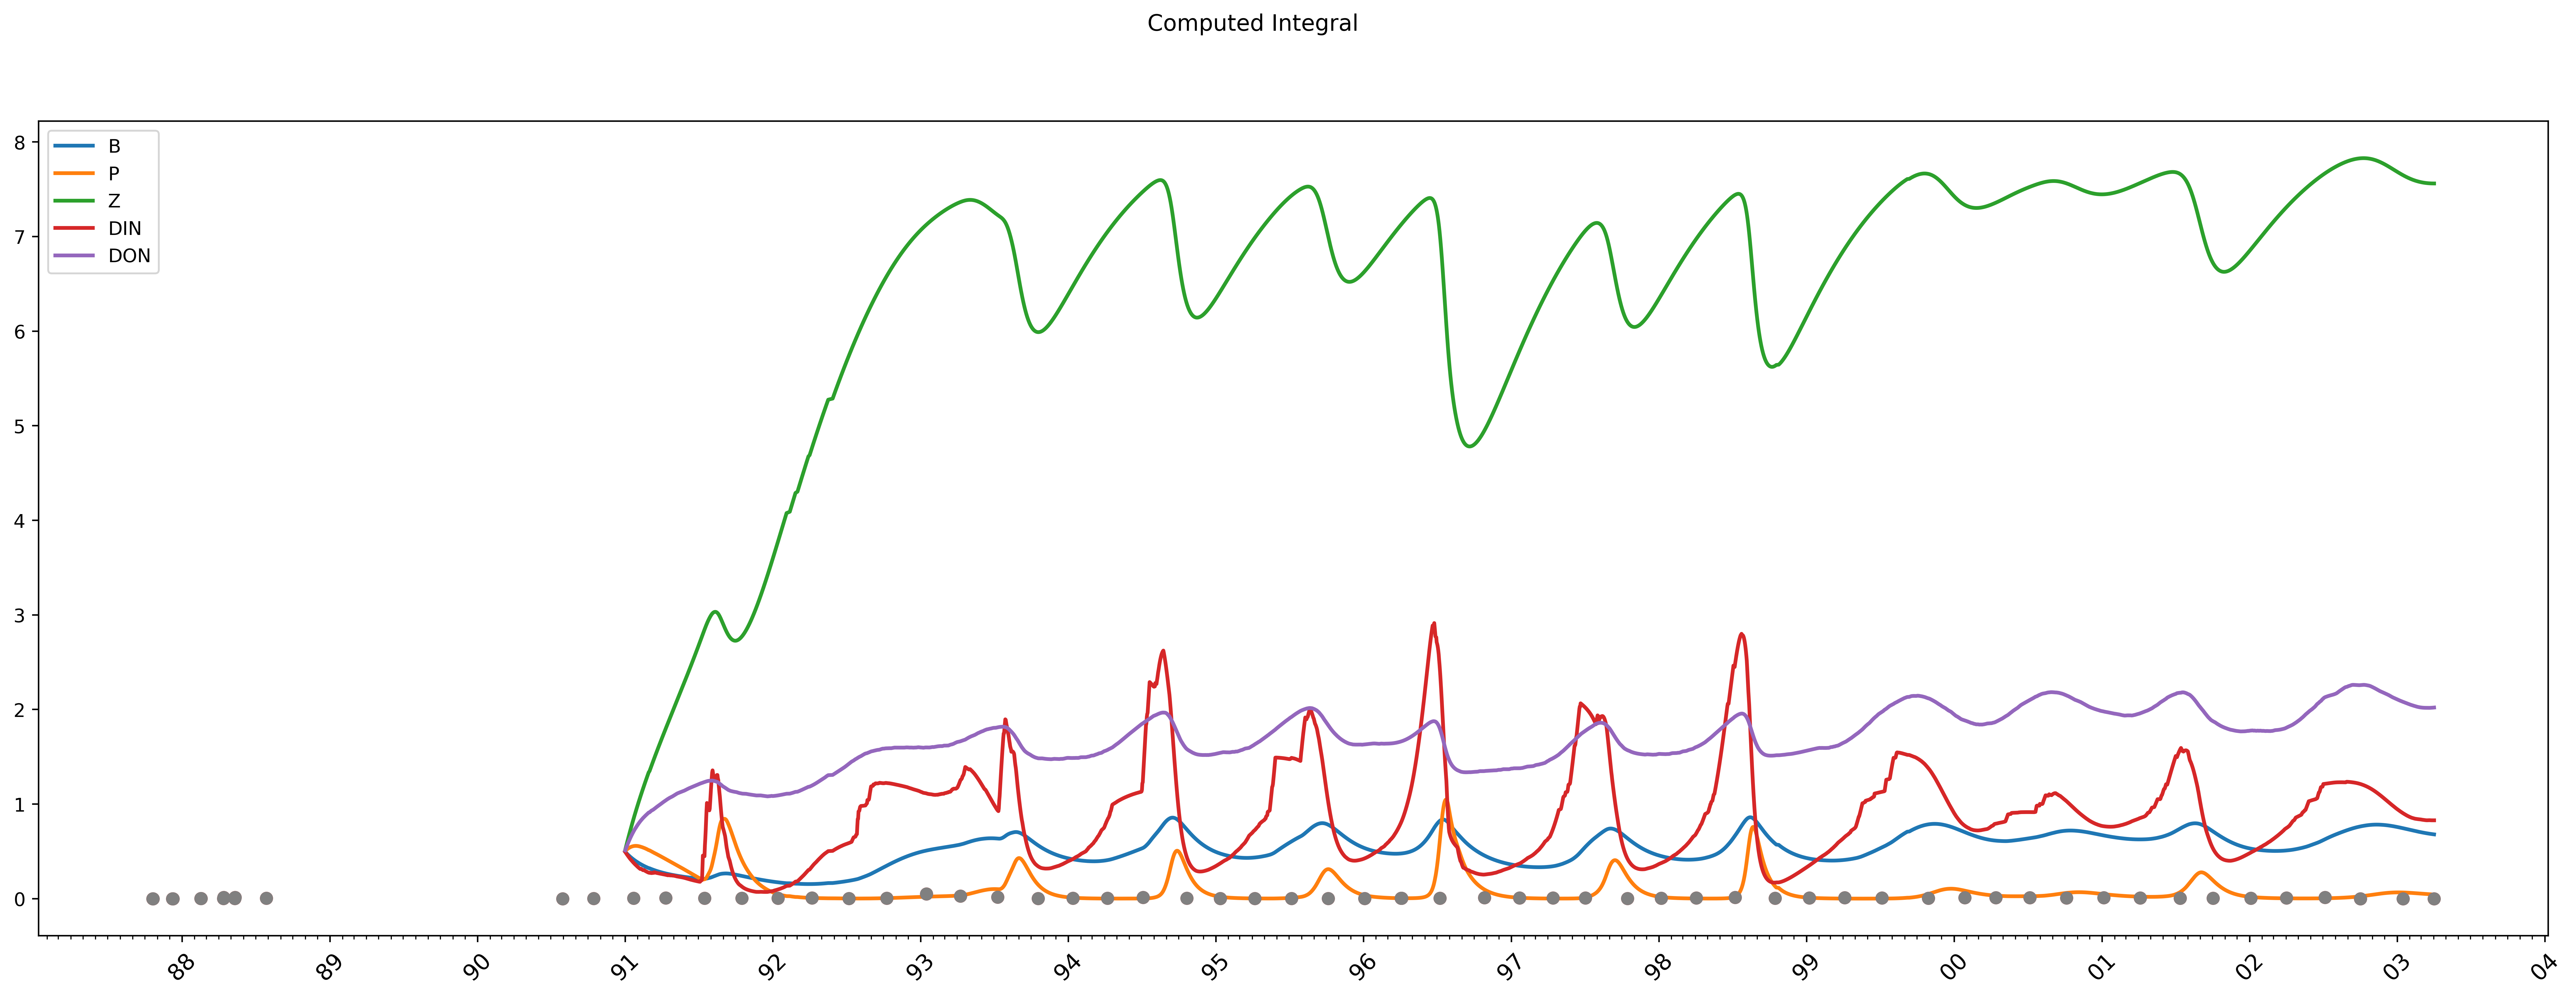

GFMODEL #51 Xtot:0.114 RMSD:0.0 RMSE:0.547 RANGE%0 MSER:3.9 WMSE:3.9
Label	Value	Min	Max	ISConst	Desc
i 	 2.54402 	 0.01 	 3.0 	 False 	 None
Pg 	 2.2672251 	 0.01 	 3.0 	 False 	 None
Bg 	 1.03903 	 0.01 	 3.0 	 False 	 None
e 	 1.77639 	 0.01 	 2.0 	 False 	 None
Zm 	 0.028854 	 0.01 	 3.0 	 False 	 None
Pm 	 2.61708 	 0.01 	 3.0 	 False 	 None
Bm 	 1.18918 	 0.01 	 1.5 	 False 	 None
Pe 	 1.24452553 	 0.01 	 3.0 	 False 	 None
Be 	 0.92205 	 0.01 	 1.5 	 False 	 None
Pr 	 2.2753 	 0.01 	 3.0 	 False 	 None
h 	 1.14171 	 0.01 	 3.0 	 False 	 None
s 	 0.1177383 	 0.01 	 3.0 	 False 	 None
f 	 0.0570468 	 0.01 	 2.0 	 False 	 None


In [9]:
#calibrate to benthos, print out the coefficients and the calibration fitness


best = NPZNB.Calibrate (NPZNBcalibration, benthos_observation, Algorithm=emlib.GF_BruteForceMSERANGE, runs =2, TimeSeries= nutrients)
NPZNB.Integrate(NPZNBcalibration.initial, Calibration=best,TimeSeries= nutrients, dt=0.01) 
NPZNB.Validate(benthos_observation, graph =True, legend=legend) 
NPZNB.fit.Print()
best.Print()

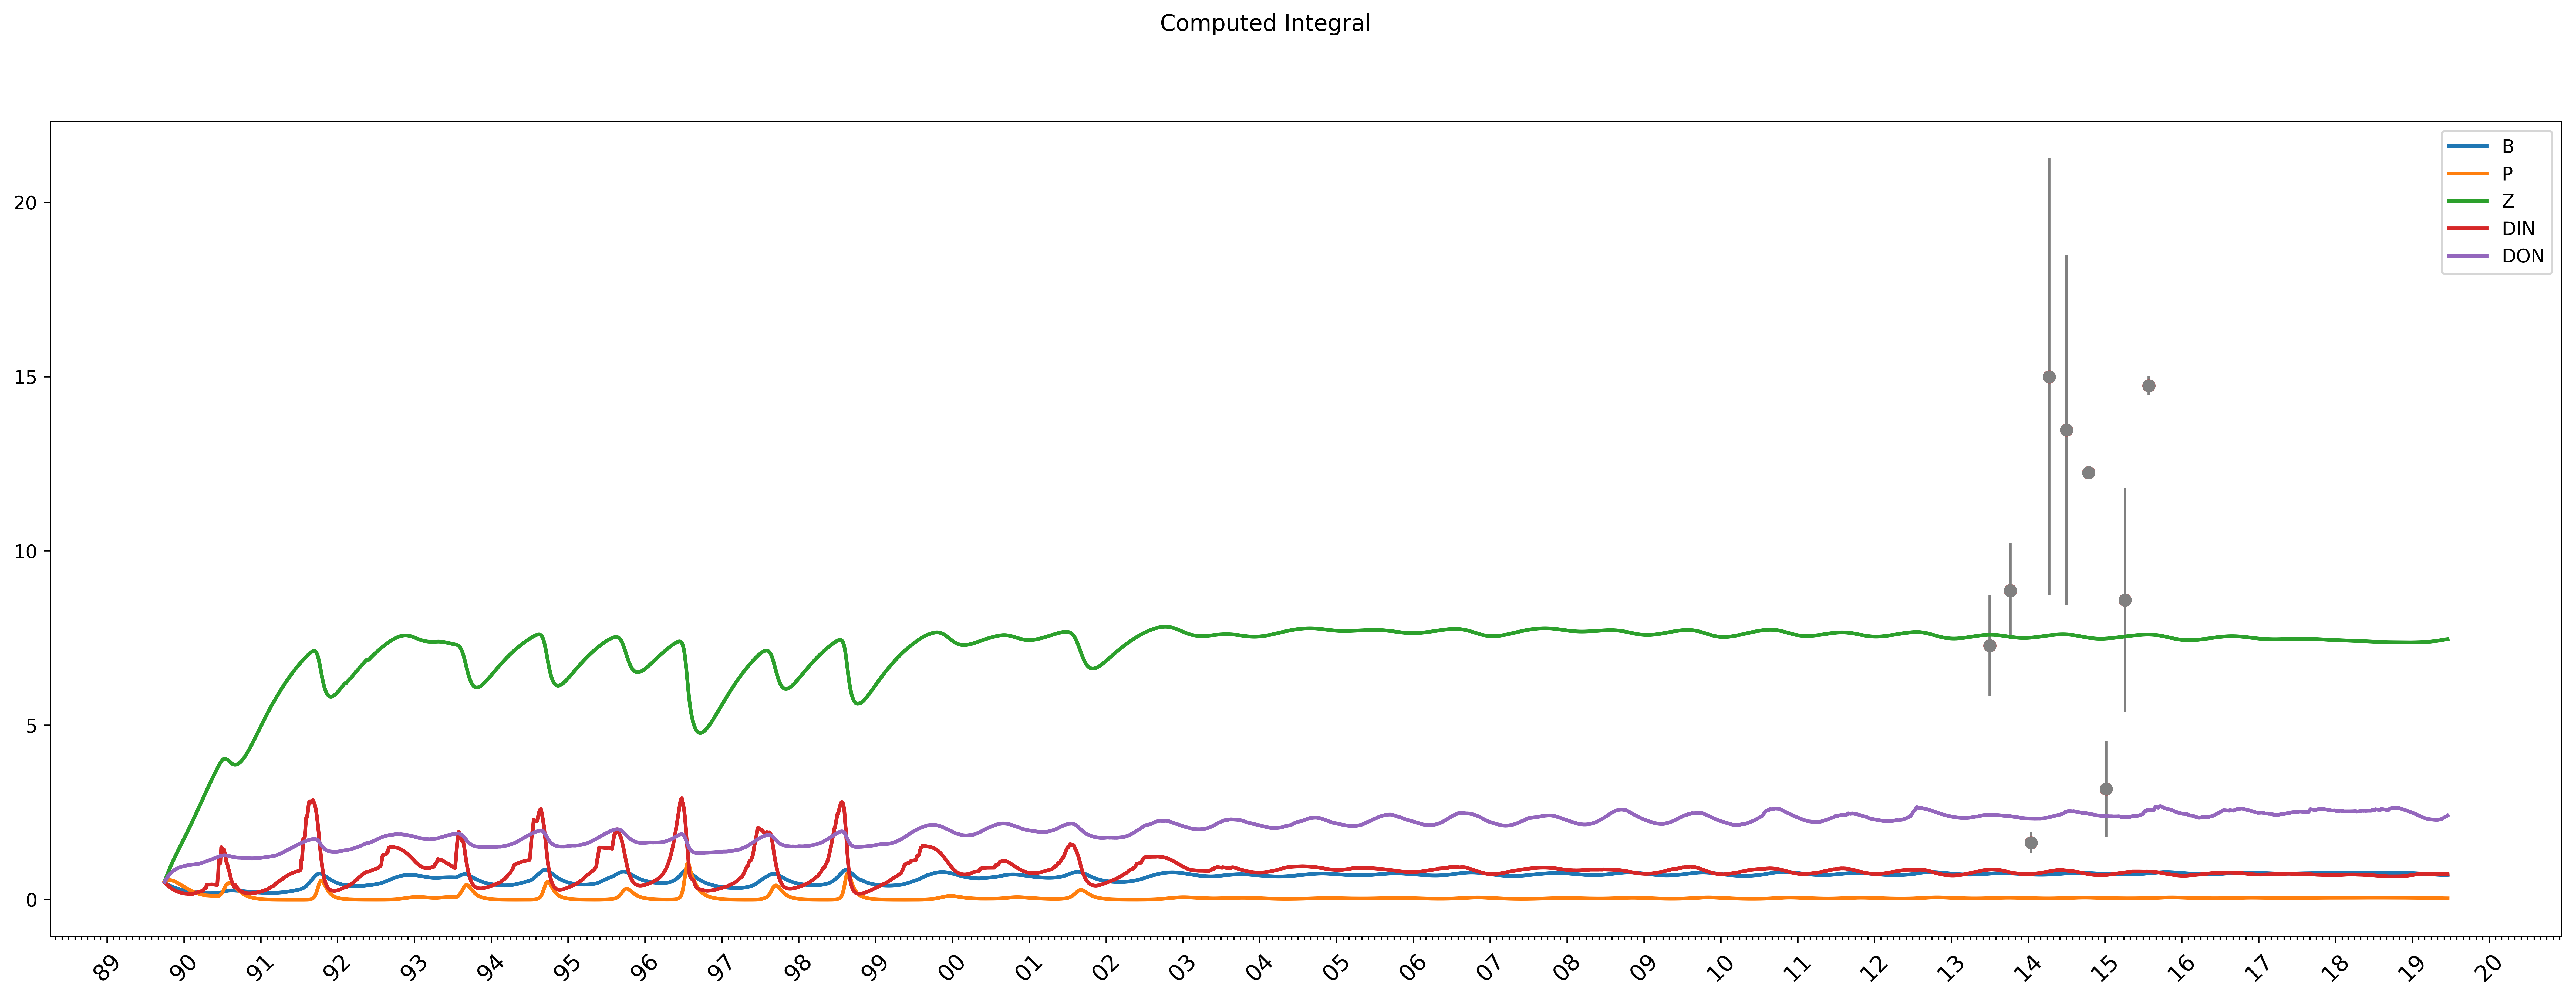

GFMODEL #9 Xtot:3.292 RMSD:9.2 RMSE:9.833 RANGE%0 MSER:23.2 WMSE:20.1
Label	Value	Min	Max	ISConst	Desc
i 	 2.54402 	 0.01 	 3.0 	 False 	 None
Pg 	 2.2672251 	 0.01 	 3.0 	 False 	 None
Bg 	 1.03903 	 0.01 	 3.0 	 False 	 None
e 	 1.77639 	 0.01 	 2.0 	 False 	 None
Zm 	 0.028854 	 0.01 	 3.0 	 False 	 None
Pm 	 2.61708 	 0.01 	 3.0 	 False 	 None
Bm 	 1.18918 	 0.01 	 1.5 	 False 	 None
Pe 	 1.24452553 	 0.01 	 3.0 	 False 	 None
Be 	 0.92205 	 0.01 	 1.5 	 False 	 None
Pr 	 2.2753 	 0.01 	 3.0 	 False 	 None
h 	 1.14171 	 0.01 	 3.0 	 False 	 None
s 	 0.1177383 	 0.01 	 3.0 	 False 	 None
f 	 0.0570468 	 0.01 	 2.0 	 False 	 None


In [7]:
#validate to CHLA
NPZNB.Integrate(NPZNBcalibration.initial, Calibration=best,TimeSeries= nutrients_alltime, dt=0.01) 
NPZNB.Validate(chla_observation, graph =True, legend=legend) 
NPZNB.fit.Print()
best.Print()